# Projet ML 2025 Groupe 4

21907809 - HUREL - Jérémy

22404183 - LEGRAND - Paul

22105390 - DANCKAERTS - Kilian

22408422 - CAUSSE - Clara



# Analyse des données

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer #Import TfidfVectorizer
!pip install nlpaug torch transformers


#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Chargement des données
df = pd.read_csv("/content/gdrive/MyDrive/dataset/scitweets_export.tsv", sep='\t')

In [ ]:
display(df.head())
display(df.shape)

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


(1140, 7)

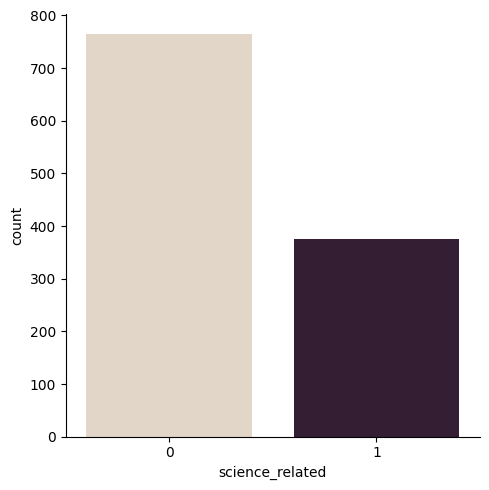

In [ ]:
display(sns.catplot(x="science_related", kind="count", palette="ch:.25", data=df))

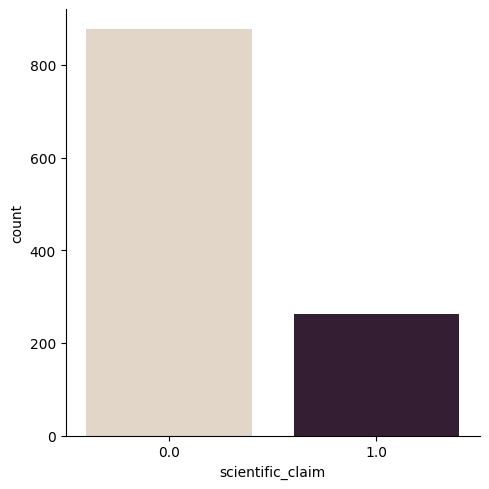

In [ ]:
display(sns.catplot(x="scientific_claim", kind="count", palette="ch:.25", data=df))

In [ ]:
df[df['science_related'] == 1].groupby(['scientific_claim']).count()

,Unnamed: 0,tweet_id,text,science_related,scientific_reference,scientific_context
scientific_claim,,,,,,
0.0,112,112,112,112,112,112
1.0,263,263,263,263,263,263


from matplotlib import pyplot as plt
_df_20['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['tweet_id'].plot(kind='hist', bins=20, title='tweet_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['text'].plot(kind='hist', bins=20, title='text')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['science_related'].plot(kind='hist', bins=20, title='science_related')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Unnamed: 0', y='tweet_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='tweet_id', y='text', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='text', y='science_related', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='science_related', y='scientific_reference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tweet_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tweet_id'}, axis=1)
              .sort_values('tweet_id', ascending=True))
  xs = counted['tweet_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('tweet_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tweet_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['text']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'text'}, axis=1)
              .sort_values('text', ascending=True))
  xs = counted['text']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('text', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('text')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['science_related']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'science_related'}, axis=1)
              .sort_values('science_related', ascending=True))
  xs = counted['science_related']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('science_related', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('science_related')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['tweet_id'].plot(kind='line', figsize=(8, 4), title='tweet_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['text'].plot(kind='line', figsize=(8, 4), title='text')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['science_related'].plot(kind='line', figsize=(8, 4), title='science_related')
plt.gca().spines[['top', 'right']].set_visible(False)

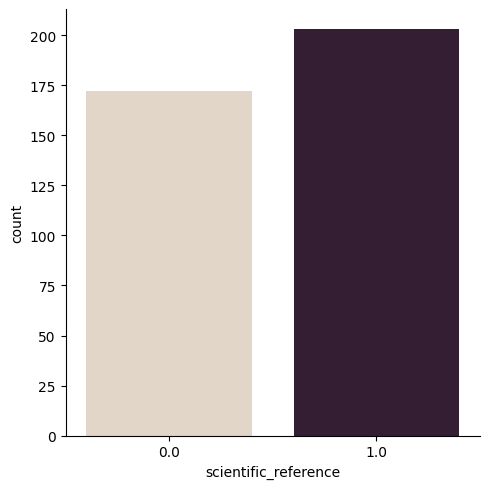

In [ ]:
display(sns.catplot(x="scientific_reference", kind="count", palette="ch:.25", data=df[df['science_related'] == 1]))

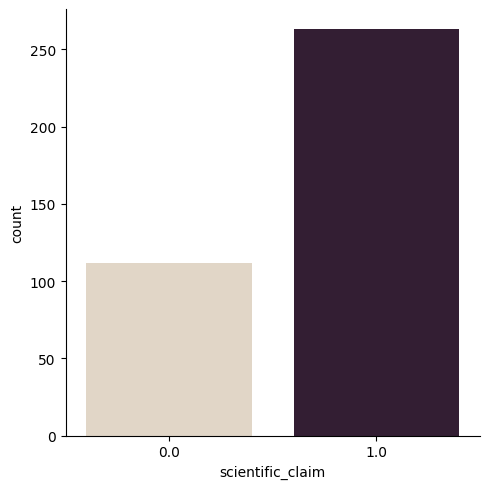

In [ ]:
display(sns.catplot(x="scientific_claim", kind="count", palette="ch:.25", data=df[df['science_related'] == 1]))

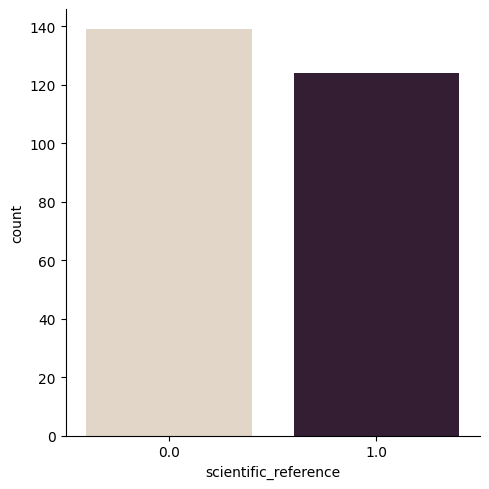

In [ ]:
display(sns.catplot(x="scientific_reference", kind="count", palette="ch:.25", data=df[(df['science_related'] == 1) & (df["scientific_claim"]== 1)]))

In [ ]:
df['Triplet'] = (df[df['science_related']==1]).apply(lambda row: f"sc={int(row['scientific_claim'])},sr={int(row['scientific_reference'])},ctx={int(row['scientific_context'])}", axis=1)

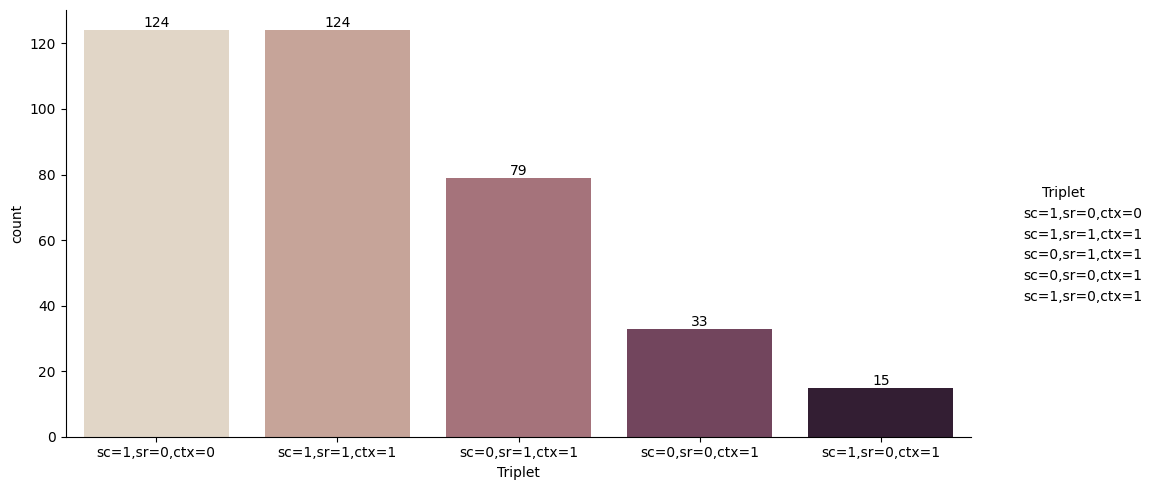

In [ ]:
g = sns.catplot(x="Triplet", kind="count", palette="ch:.25", data=df, aspect=2)

# Add count labels
ax = g.ax
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position
        p.get_height(),  # Y position
        int(p.get_height()),  # Count value
        ha="center", va="bottom"  # Alignment
    )

plt.show()

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
import emoji

tweet_text = df['text'].values
tweet_text = [emoji.demojize(tweet) for tweet in tweet_text]
display(tweet_text)

["Knees are a bit sore. i guess that's a sign that my recent treadmilling is working",
 "McDonald's breakfast stop then the gym :basketball::flexed_biceps:",
 'Can any Gynecologist with Cancer Experience explain the dangers of Transvaginal Douching with Fluoride or other toxins such as Dioxin? #PDX',
 'Couch-lock highs lead to sleeping in the couch. Gotta stop doing this shit.',
 'Does daily routine help prevent problems with bipolar disorder http://t.co/XGUfUDoLJB',
 'The Impact of Infertility on You and Your Relationship http://t.co/7pF7Z0wH8f',
 '“Traffic Jam” In Brain’s Neurons Could Be Cause Of Statin-Related Cognitive Decline http://t.co/kQ3XPdePKX',
 'Can playing more games improve lives and save the world? by @chris_pelle via @PostArcade http://t.co/uEtVu099Ad #CDA30',
 'The effect of climate change on iceberg production by Greenland glaciers http://t.co/CtnPhcmD7c',
 '@HankAzaria @TheSimpsons oh loneliness and cheeseburgers are a dangerous mix',
 '#bbcsportsday Honestly think 

In [ ]:
import re

def extract_all_emojis(text):
    for e in emoji.emoji_list(text):
        yield emoji.demojize(e['emoji'])


emoji_list = []
for text in df['text'].values:
    for e in extract_all_emojis(text):
        emoji_list.append(e)

pattern =re.compile("https?://\S+|\w+:|[@/#]"+"|".join(emoji_list))




display(pattern)




re.compile(r'https?://\S+|\w+:|[@/#]:basketball:|:flexed_biceps:|:registered:|:face_with_tears_of_joy:|:raised_hand:|:woman_dancing:|:sparkling_heart:|:skull:|:skull:|:skull:|:skull:|:winking_face:|:face_with_medical_mask:|:face_with_tears_of_joy:|:United_States:|:United_States:|:anguished_face:|:neutral_face:|:neutral_face:|:neutral_face:|:raised_hand:|:skull:|:face_with_tears_of_joy:|:leaf_fluttering_in_wind:|:bouquet:|:maple_leaf:|:bouquet:|:leaf_fluttering_in_wind:|:backhand_index_pointing_right:|:crying_face:|:sun:|:flexed_biceps:|:face_with_tears_of_joy:|:face_with_tears_of_joy:|:smiling_face_with_sunglasses:|:red_heart:|:enraged_face:|:smiling_face_with_smiling_eyes:|:hundred_points:|:grimacing_face:|:hundred_points:|:loudly_crying_face:|:loudly_crying_face:|:woman_dancing_light_skin_tone:|:check_mark:|:right_arrow:|:check_mark:|:winking_face_with_tongue:|:winking_face_with_tongue:|:winking_face_with_tongue:|:winking_face_with_tongue:|:winking_face_with_tongue:|:winking_face_wit

In [ ]:
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.flow as nafc
from nlpaug.util import Action
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


# Define text and keywords to protect

keywords = [pattern.findall(text) for text in tweet_text]
keywords = [item for sublist in keywords for item in sublist]
keywords = list(set(keywords))


tweet_copy = tweet_text.copy()

for i, word in enumerate(keywords):
    for j, text in enumerate(tweet_copy):
      text = text.replace(word, f"KEYWORD_{i}")

# Step 2: Apply augmentation
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)
for i, text in enumerate(tweet_copy):
    augmented_text = aug.augment(text)[0]
    tweet_copy[i] = augmented_text

print(tweet_copy)
# Step 3: Restore original keywords
for i, word in enumerate(keywords):
    for j, text in enumerate(tweet_copy):
      text = text.replace(f"KEYWORD_{i}", word)

print(tweet_copy)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


["Knees are a bit sore. i guess that ' s a sign that my recent treadmilling be ferment", "McDonald ' s breakfast stop and then the gymnasium: hoops: : flexed_biceps:", 'Stool any Gynecologist with Cancer Experience excuse the danger of Transvaginal Douching with Fluoride or early toxins such as Dioxin? # PDX', "Couch - ringlet heights run to catch some z's in the couch. Gotta stop coiffure this shit.", 'Does daily routine help forestall job with bipolar upset http: / / tonne. co / XGUfUDoLJB', 'The Wallop of Sterility on You and Your Kinship http: / / tonne. cobalt / 7pF7Z0wH8f', '“ Dealings Jam ” In Learning ability ’ s Nerve cell Could Beryllium Movement Of Statin - Related Cognitive Decline http: / / t. co / kQ3XPdePKX', 'Bathroom playing more game improve lives and save the world? by @ chris_pelle via @ PostArcade hypertext transfer protocol: / / thyroxin. co / uEtVu099Ad # CDA30', 'The effect of climate alteration on iceberg yield by Kalaallit nunaat glaciers http: / / mt. co / Ct

In [ ]:
science_related_result = df['science_related'].values
display(science_related_result)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(tweet_text).toarray()  # Conversion en tableau dense

tweet_train, tweet_test, science_related_result_train, science_related_result_test = train_test_split(X, science_related_result, test_size=0.3, random_state=42)

#Training without data augmentation or data reduction

In [ ]:
gnb = GaussianNB()
training = (gnb.fit(tweet_train, science_related_result_train).predict(tweet_test))
display(training)
display(accuracy_score(science_related_result_test,training))

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

0.716374269005848

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

classifiers_params = {
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 15, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Naive Bayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}


In [ ]:
accuracy_results = {}
# 'KNN': 0.7573099415204678, 'Decision Tree': 0.7397660818713451, 'Naive Bayes': 0.716374269005848, 'SVM': 0.6754385964912281, 'Random Forest': 0.7456140350877193


for name, clf in classifiers.items():

    tmp = GridSearchCV(estimator=clf, param_grid=classifiers_params[name], cv=5)
    tmp.fit(tweet_train, science_related_result_train)
    predictions = tmp.predict(tweet_test)
    accuracy = accuracy_score(science_related_result_test, predictions)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

KNN Accuracy: 0.7543859649122807
Decision Tree Accuracy: 0.7690058479532164
Naive Bayes Accuracy: 0.716374269005848
SVM Accuracy: 0.7982456140350878
Random Forest Accuracy: 0.7426900584795322


In [ ]:
print(accuracy_results)

{'KNN': 0.7573099415204678, 'Decision Tree': 0.7397660818713451, 'Naive Bayes': 0.716374269005848, 'SVM': 0.6754385964912281, 'Random Forest': 0.7456140350877193}


[Comparaison entre le meilleur et pire classifier sans traitement des données](https://www.geeksforgeeks.org/svm-vs-knn-in-machine-learning/)

#Test de précision avec les meilleurs paramètres pour KNN

In [ ]:
y